In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
data = pd.read_csv('./weather.csv')

In [3]:
data

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,3,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,4,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,5,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,363,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,364,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,365,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


First let us check for missing values

In [4]:
data.isnull().any()

Day Number       False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

As seen above, columns - Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am contain null valaues. Let us deep dive individually into these columns to handle the missing values

Let us start with Sunshine


In [5]:
data.loc[data['Sunshine'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
221,222,7.4,16.3,0.0,1.2,NaN,NNE,30.0,SSE,NE,...,65,1031.4,1027.9,7,7,12.1,14.5,No,6.2,Yes
300,301,-3.3,15.1,0.0,3.0,NaN,SSW,30.0,SSE,SE,...,23,1027.7,1025.5,1,1,7.9,14.4,No,0.0,No
348,349,11.9,21.1,13.2,6.6,NaN,NW,41.0,NNE,N,...,61,1019.2,1016.7,7,3,14.5,19.4,Yes,0.6,No


<Axes: ylabel='Frequency'>

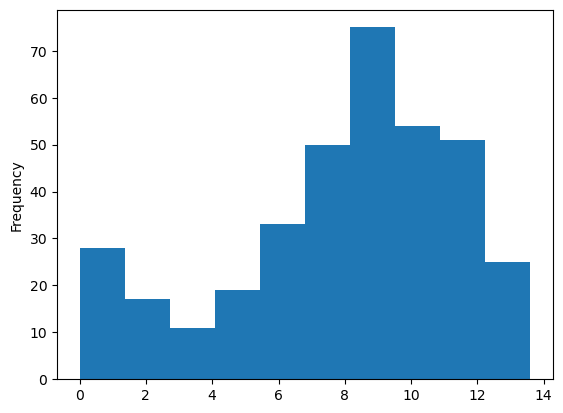

In [6]:
data['Sunshine'].plot.hist()

Here we are trying to figure out values to fill for null values. I have plotted the data in Sunshine column to visualise where the data is lying. We are trying to figure out which numbers are present in abundance. from the above plot, we can tell that numbers between 7-12 have occured the most in 'Sunshine' column with number 9 present more than 70 times. Numbers between 2-5 can be considered as outliers as they have occured the least. This type of plot gives us an idea that the mean also will be in the 7-10 range. Let us further investigate

In [7]:
data['Sunshine'].describe()

count    363.000000
mean       7.909366
std        3.481517
min        0.000000
25%        5.950000
50%        8.600000
75%       10.500000
max       13.600000
Name: Sunshine, dtype: float64

Here we can observe that the mean is almost 8 which matches with our interpretations in previous step. To further investigate: 
- We have mean as 7.9
- The standard deviation is not very significant which means most of the values are closer to the mean. 
- 75% of the data in Sunshine column is below 10.5
- Max occured number is 13

From the above insights, we can choose a value between 8-10 for the missing value issue. I will replace empty values in 'Sunshine' with 9 as it seems like most fit option for the data

In [8]:
data['Sunshine'].fillna(value=9, inplace=True)

I have filled values with '9', and checking below if change is reflected. As it can be seen there are 0 rows which means Sunshine has no null values

In [9]:
data.loc[data['Sunshine'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


Moving on to next column, WindGustDir. Checking for null rows

In [10]:
data.loc[data['WindGustDir'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
193,194,9.4,19.2,0.0,2.2,7.7,NaN,24.0,E,NNW,...,47,1024.2,1020.3,7,1,12.1,18.8,No,0.0,No
211,212,-0.1,18.0,0.0,2.0,8.6,NaN,NaN,N,NNW,...,46,1033.2,1028.7,1,1,5.6,17.4,No,0.0,No
271,272,0.8,12.2,0.0,1.8,8.6,NaN,NaN,S,S,...,49,1020.9,1016.8,3,1,6.5,11.2,No,0.0,No


In [11]:
data['WindGustDir'].unique()

array(['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE',
       'NNW', 'SW', 'W', 'WSW', 'SSW', nan], dtype=object)

<Axes: >

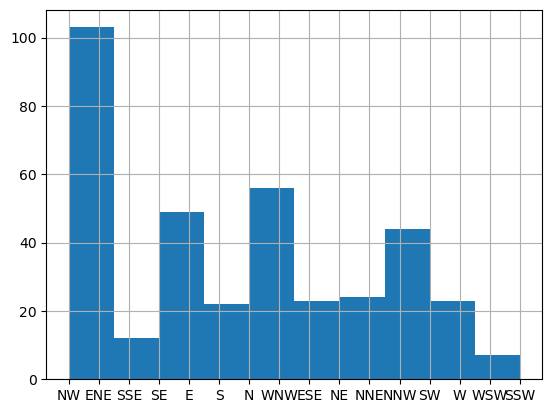

In [12]:
data['WindGustDir'].hist()

In this case, the same apporach cannot be used. Here we have categoric data, from my observation, WSW and SSW are least occuring. I see that NW is most frequent with 100+ occurances whereas other values are not occuring even half of that, hence I will replace empty values with 'NW'

In [13]:
data['WindGustDir'].fillna(value='NW', inplace=True)

In [14]:
data.loc[data['WindGustDir'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


Handling Null values for 'WindGustSpeed'

In [15]:
data.loc[data['WindGustSpeed'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
211,212,-0.1,18.0,0.0,2.0,8.6,NW,NaN,N,NNW,...,46,1033.2,1028.7,1,1,5.6,17.4,No,0.0,No
271,272,0.8,12.2,0.0,1.8,8.6,NW,NaN,S,S,...,49,1020.9,1016.8,3,1,6.5,11.2,No,0.0,No


<Axes: ylabel='Frequency'>

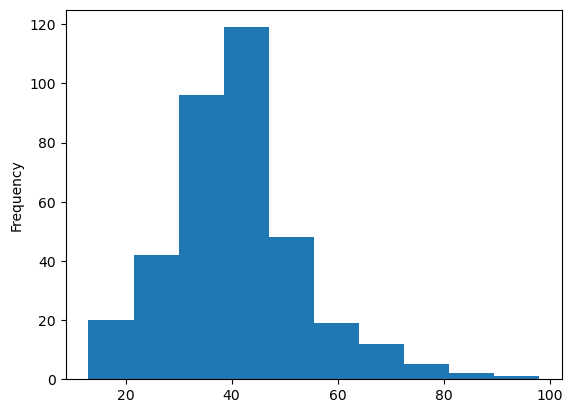

In [16]:
data['WindGustSpeed'].plot.hist()

In [17]:
data['WindGustSpeed'].describe()

count    364.000000
mean      39.840659
std       13.059807
min       13.000000
25%       31.000000
50%       39.000000
75%       46.000000
max       98.000000
Name: WindGustSpeed, dtype: float64

In this scenario, we can observe similar to bell pattern. On observing the plot and the statistics:
- Most values lie between 30 - 50 range.
- Mean > Median which can mean that the data is positively skewed. Since mean is greater than the middle value of the data, it suggests that there are some outliers influencing the mean
- The above mentioned trend can be observed in the plot. Values are ranging till 100 but in very less quantities
- From stats, 75% of the data lies below 46, but the max value is 98. Indicating large gap in 75th percentile and max value which justifies the longer tail seen in the plot
- Since data is positively skewed, median would be a better option than mean. Since mean is influenced by outliers

Hence I will choose median value (39) as the value to fill in. Altough in this case mean is almost similar to median, we will continue with median

In [18]:
data['WindGustSpeed'].fillna(value=39, inplace=True)

In [19]:
data.loc[data['WindGustSpeed'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


The missing values have been removed. Let us move to the next column - WindDir9am

In [20]:
data.loc[data['WindDir9am'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
113,114,12.7,28.6,6.6,3.2,8.6,W,50.0,NaN,W,...,42,1008.3,1002.3,5,5,16.5,27.4,Yes,0.0,No
118,119,11.7,27.6,0.0,7.8,8.1,W,48.0,NaN,W,...,25,1013.6,1009.1,2,6,17.6,26.8,No,0.0,No
127,128,10.8,29.2,0.0,8.4,7.5,E,50.0,NaN,ENE,...,34,1021.6,1017.7,0,7,17.5,27.7,No,3.0,Yes
138,139,12.5,29.9,0.0,5.8,10.7,NW,43.0,NaN,WNW,...,30,1022.7,1018.8,0,1,16.8,29.2,No,0.0,No
140,141,11.5,29.3,0.0,5.2,8.0,NW,46.0,NaN,WSW,...,35,1013.8,1009.4,7,7,17.1,27.6,No,0.0,No
174,175,7.5,19.0,0.0,4.0,6.8,ENE,26.0,NaN,ESE,...,43,1025.5,1022.2,6,5,12.6,18.1,No,0.0,No
176,177,5.0,20.9,0.0,2.0,8.9,WNW,22.0,NaN,NW,...,42,1019.9,1014.3,7,6,10.1,20.6,No,0.2,No
180,181,-2.1,13.8,0.2,1.8,9.5,NNW,22.0,NaN,NNW,...,40,1020.6,1019.6,0,1,6.3,13.2,No,0.0,No
189,190,-0.2,18.1,0.0,4.4,9.4,NW,24.0,NaN,NW,...,44,1021.4,1018.9,1,1,6.7,16.9,No,0.0,No
195,196,2.2,18.6,0.0,2.0,9.2,NNW,31.0,NaN,NNW,...,44,1024.4,1021.0,1,3,8.5,17.8,No,0.0,No


<Axes: >

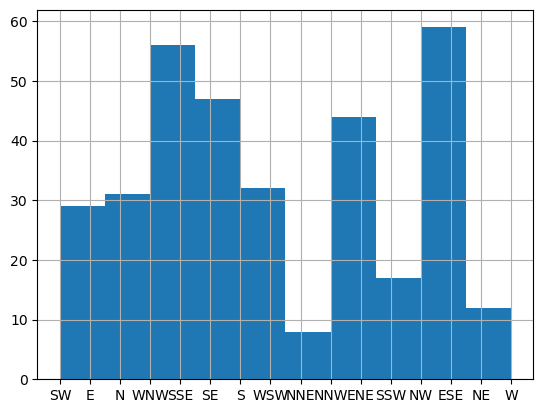

In [21]:
data['WindDir9am'].hist()

In [22]:
data['WindDir9am'].value_counts()

SE     47
SSE    40
NNW    36
N      31
NW     30
ESE    29
S      27
E      22
SSW    17
WNW    16
NNE     8
ENE     8
W       8
SW      7
WSW     5
NE      4
Name: WindDir9am, dtype: int64

In this case, we have 31 rows containing missing data. On observing the values present in 'WindDir9am', we can see that there is no clear value to select. With SE and SSE having highest frequency, we can choose the missing vlaue to be SE. Since there are 31 rows misisng data, it will be difficult to exclude so many rows. Hence we are opting to replace missing values with SE

In [23]:
data['WindDir9am'].fillna(value='SE', inplace=True)

In [24]:
data.loc[data['WindDir9am'].isna()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


Moving on to next column containing null values, WindDir3pm

In [25]:
data.loc[data['WindDir3pm'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
222,223,8.6,13.7,6.2,2.2,0.0,NW,31.0,E,NaN,...,94,1027.8,1024.3,8,8,10.3,11.6,Yes,4.8,Yes


In [26]:
data['WindDir3pm'].value_counts()

NW     61
WNW    61
NNW    47
N      30
ESE    27
W      26
E      17
NE     15
NNE    14
S      14
ENE    13
SE     12
WSW    11
SSE     7
SSW     6
SW      4
Name: WindDir3pm, dtype: int64

Since in this case, we have only 1 row misisng data, we will replace the missing value with either NW or WNW since both these values have occured the maximum times. SSE, SSW, SW can be considered as outlierds as thet are appearning in very less counts

In [27]:
data['WindDir3pm'].fillna(value='NW', inplace=True)

In [28]:
data.loc[data['WindDir3pm'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow


Moving on to the last column containing, null data - WindSpeed9am

In [29]:
data.loc[data['WindSpeed9am'].isnull()]

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
113,114,12.7,28.6,6.6,3.2,8.6,W,50.0,SE,W,...,42,1008.3,1002.3,5,5,16.5,27.4,Yes,0.0,No
118,119,11.7,27.6,0.0,7.8,8.1,W,48.0,SE,W,...,25,1013.6,1009.1,2,6,17.6,26.8,No,0.0,No
127,128,10.8,29.2,0.0,8.4,7.5,E,50.0,SE,ENE,...,34,1021.6,1017.7,0,7,17.5,27.7,No,3.0,Yes
195,196,2.2,18.6,0.0,2.0,9.2,NNW,31.0,SE,NNW,...,44,1024.4,1021.0,1,3,8.5,17.8,No,0.0,No
213,214,0.6,14.0,0.0,2.2,2.7,NE,17.0,SE,ENE,...,67,1032.3,1028.9,7,7,4.6,13.9,No,0.0,No
247,248,-0.1,14.2,0.0,1.4,7.0,W,13.0,SE,WNW,...,55,1032.9,1028.9,1,2,4.7,12.6,No,0.0,No
257,258,-1.7,13.6,0.0,1.8,5.2,NNW,28.0,SE,NNW,...,46,1023.0,1020.1,1,7,3.9,13.3,No,0.2,No


<Axes: ylabel='Frequency'>

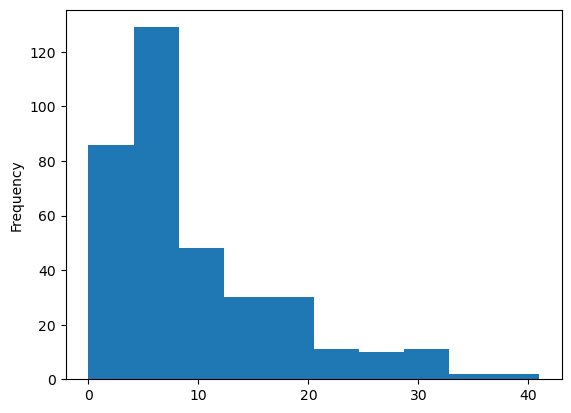

In [30]:
data['WindSpeed9am'].plot.hist()

In [31]:
data['WindSpeed9am'].describe()

count    359.000000
mean       9.651811
std        7.951929
min        0.000000
25%        6.000000
50%        7.000000
75%       13.000000
max       41.000000
Name: WindSpeed9am, dtype: float64

Similar to WindGustSpeed, even WindSpeed9am appears to have positively skewed data. We can observe:
- Mean > Median indicating outliers. This can also be observed in the plot. We can see values greater than 20 are in very less quantity
- There is high standard deviation from mean as well
- 75% of the values are below 13, but we can see the max value is 41 
- This tells us that the data mostly lies in the 0 to 13 range

Based on the above insights, I feel that since the mean is highly skewed by the outliers, median will be a better measure. Hence we will set the null values to 7

In [32]:
data['WindSpeed9am'].fillna(value=7, inplace=True)

Now we have our data ready to be modeled. We have handled the null values as seen below.

In [33]:
data.isnull().any()

Day Number       False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [34]:
data.corr()

/var/folders/jl/vb19m_b13k38jb1_prkhrmth0000gn/T/ipykernel_23859/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
Day Number,1.000000,-0.655682,-0.540103,-0.147967,-0.350377,-0.032668,0.079553,0.074799,0.280186,-0.029452,-0.042443,0.326285,0.319532,-0.133501,-0.152711,-0.583006,-0.521359,-0.151170
MinTemp,-0.655682,1.000000,0.752471,0.201939,0.649930,0.034688,0.217627,0.128358,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,-0.540103,0.752471,1.000000,-0.073560,0.690026,0.450035,0.109702,-0.214689,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,-0.147967,0.201939,-0.073560,1.000000,-0.007293,-0.147449,0.096279,0.219487,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,-0.350377,0.649930,0.690026,-0.007293,1.000000,0.315922,0.288053,0.069779,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,-0.032668,0.034688,0.450035,-0.147449,0.315922,1.000000,0.094342,-0.062972,0.072663,-0.497630,-0.754093,0.008705,-0.033330,-0.676882,-0.658781,0.218794,0.468367,-0.377416
WindGustSpeed,0.079553,0.217627,0.109702,0.096279,0.288053,0.094342,1.000000,0.520873,0.693613,-0.349536,-0.069493,-0.537508,-0.524754,-0.012421,0.050452,0.255725,0.072609,0.252028
WindSpeed9am,0.074799,0.128358,-0.214689,0.219487,0.069779,-0.062972,0.520873,1.000000,0.467935,-0.270929,0.145636,-0.352542,-0.244315,0.104044,-0.025339,0.065398,-0.233374,0.040489
WindSpeed3pm,0.280186,-0.065922,-0.167873,0.056008,0.048601,0.072663,0.693613,0.467935,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.029452,-0.207897,-0.359602,0.150109,-0.519587,-0.497630,-0.349536,-0.270929,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931


/var/folders/jl/vb19m_b13k38jb1_prkhrmth0000gn/T/ipykernel_23859/647041274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Reds', annot=False)


<Axes: >

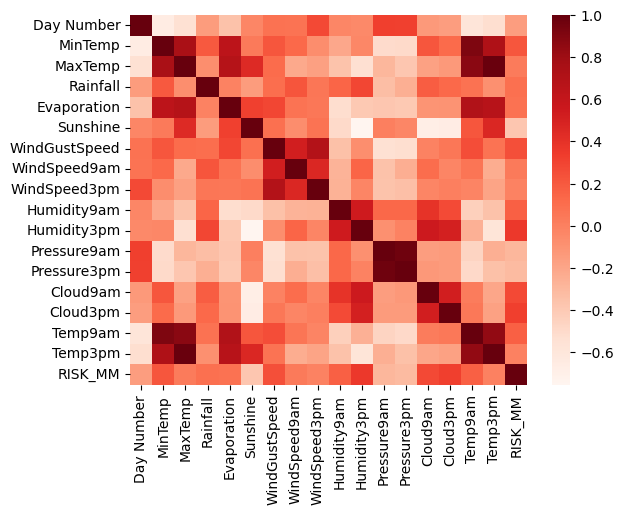

In [35]:
sns.heatmap(data.corr(), cmap='Reds', annot=False)

Correlation Analysis: We can observe high correlation in 
- Temp9am and MinTemp: Indicating they are similar/temperatures at 9am are closer to the Min temperatures of the day 
- Temp3pm and MaxTemp: Indicating maximum temperature of the day could be similar to that at 3pm 
- MaxTemp and Evaporation: Suggesting that there is more evaporation observed at higher temperatures 
- Rainfall and Humidity: Suggesting that there are higher chances of rainfall with higher humidity
- Cloud and Humidity: Indicating high number of clouds with more humidity 

Let us visualise these relationships to further check for correlation

<Axes: xlabel='MinTemp', ylabel='Temp9am'>

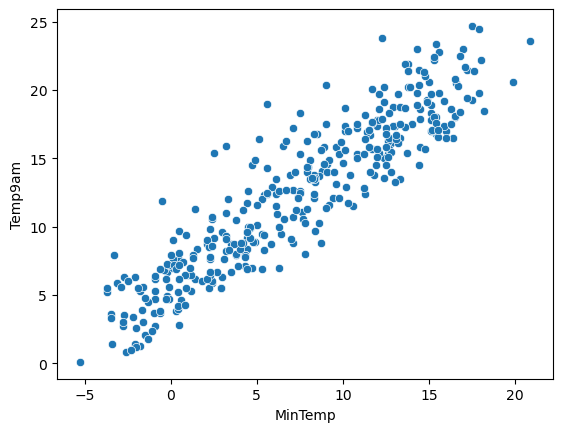

In [36]:
sns.scatterplot(data=data, x='MinTemp', y= 'Temp9am')

<Axes: xlabel='MaxTemp', ylabel='Temp3pm'>

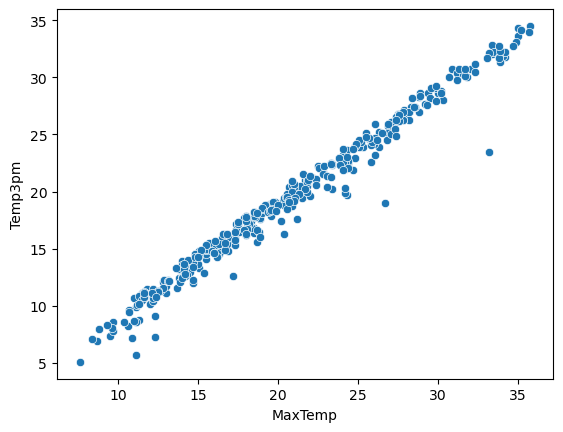

In [37]:
sns.scatterplot(data=data, x='MaxTemp', y= 'Temp3pm')

<Axes: xlabel='Evaporation', ylabel='MaxTemp'>

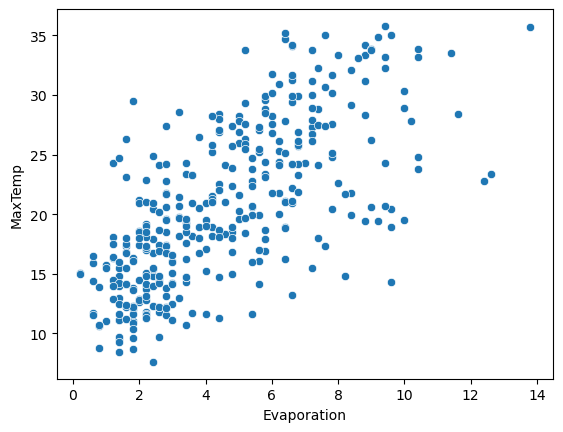

In [38]:
sns.scatterplot(data=data, x='Evaporation', y= 'MaxTemp')

As seen above, the plots appaear liniear in nature indicating high correlation, which matches with our analysis above

### Linear Regression Modeling:
By definition, we are trying to understand how the target variable responds based on the features used for modeling. 
In our case, target variable is 'Rain Today' and 'Rain Tomorrow'. We will check how various attributes/features affect the target variable. In other words, we will investigate the realtionship between features and target variable

First step is to try and figure out the significant features

### Enoding target variable 'RainToday' and 'RainTomorrow' to numeric (for regression modeling)

In [39]:
modeling_data = data.copy()  

for i in range(len(modeling_data)):
    if modeling_data['RainToday'].iloc[i] == 'Yes':
        modeling_data['RainToday'].iloc[i] = 1
    else:
        modeling_data['RainToday'].iloc[i] = 0

/var/folders/jl/vb19m_b13k38jb1_prkhrmth0000gn/T/ipykernel_23859/2918072551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_data['RainToday'].iloc[i] = 0
/var/folders/jl/vb19m_b13k38jb1_prkhrmth0000gn/T/ipykernel_23859/2918072551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_data['RainToday'].iloc[i] = 1


In [59]:
modeling_data['RainToday'] = modeling_data['RainToday'].astype(int)

Checking to see if the data is encoded. Below we can see that 'RainToday' column has been encoded successfully. Let us use a different approach for encoding 'RainTomorrow' as this apporach has generated warnings

In [60]:
modeling_data

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,2,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,3,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,4,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,5,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,...,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0,0
362,363,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0,0
363,364,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0,0
364,365,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,...,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0,0


In [41]:
modeling_data['RainTomorrow'] = modeling_data['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [42]:
modeling_data

,Day Number,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,2,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,3,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,4,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,5,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,...,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0,0
362,363,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0,0
363,364,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0,0
364,365,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,...,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0,0


In [56]:
formula = 'RainTomorrow ~ MinTemp+MaxTemp+Rainfall+Evaporation+Sunshine+WindGustSpeed+WindSpeed9am+WindSpeed3pm+Humidity9am+Humidity3pm+Pressure9am+Pressure3pm+Cloud9am+Cloud3pm + Temp9am+Temp3pm'

In [57]:
import statsmodels.formula.api as smf

result_tomorrow = smf.ols(formula = formula, data = modeling_data).fit()


In [58]:
print(result_tomorrow.summary())

                            OLS Regression Results                            
Dep. Variable:           RainTomorrow   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     16.53
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           6.06e-34
Time:                        18:48:30   Log-Likelihood:                -66.257
No. Observations:                 366   AIC:                             166.5
Df Residuals:                     349   BIC:                             232.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0983      3.599      3.084

Here, inorder to determine which features are statistically significant and which are not, I have tested dependent variable against all the features. Takeaways from the analysis:
- Rsquared value = 0.431, indicating that the features provide about 43% variability in the target variable 'Rain Tomorrow'. Which tells us that there are significant features
- Looking at P values for the variables, we can say that Evaporation, Sunshine, WindgustSpeed, WindSpeed3pm,Humidity, Pressure are statistically significant variables(P<0.05). In other words, 'RainTomorrow' is influenced by the mentioned variables.
- For example, for 1 unit increase in WindSpeed3pm, 'Rain Tomorrow' decreases by 0.008 (since its coef is -0.0081)

### Prediction Model

Here we are building a prediction model based on Linear Regression, which will predict if it will rain tomorrow or not

In [64]:
from sklearn.model_selection import train_test_split

features = ['Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm','Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm']

X = modeling_data[features]
y = modeling_data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 79)

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [67]:
lr.coef_

array([ 0.0238303 , -0.0295714 ,  0.00849154, -0.00748825,  0.00161684,
        0.00675042,  0.05635945, -0.06945327])

In [69]:
y_pred = lr.predict(X_test)

In [78]:
result = pd.DataFrame({'Predicted_RainTomorrow': y_pred.round(2), 'Actual': y_test})
result

,Predicted_RainTomorrow,Actual
138,0.09,0
236,0.33,0
308,0.26,0
260,0.31,1
348,0.27,0
...,...,...
345,-0.09,0
197,0.53,0
72,0.68,1
109,0.14,0


As seen above, it is difficult to get accuracy in such type of model where categoric variable has been converted to binary in orrder to perform Linear Regression. Yet, we are achieving close to true value results as seen above.
